In [198]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

In [75]:
os.chdir("D:\\edWisor\\Project-II")

In [262]:
df = pd.read_excel("Absenteeism_at_work_Project.xls")

In [171]:
def returnPreProcessedData(df):
    df = returnMissinfValuesdf(df)
    df = missing_values(df)
    
    return df

In [ ]:
def returnMissinfValuesdf(df):
    missing_val = pd.DataFrame(df.isnull().sum())
    #Reset index
    missing_val = missing_val.reset_index()

    #Rename variable
    missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

    #Calculate percentage
    missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

    #descending order
    missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
    return missing_val

In [263]:
missing_val = returnMissinfValuesdf(df)
missing_val

,Variables,Missing_percentage
0,Body mass index,4.189189
1,Absenteeism time in hours,2.972973
2,Height,1.891892
3,Work load Average/day,1.351351
4,Education,1.351351
5,Transportation expense,0.945946
6,Son,0.810811
7,Disciplinary failure,0.810811
8,Hit target,0.810811
9,Social smoker,0.540541


In [ ]:
def missing_values(df):
    df.loc[df['Reason for absence'] == 0,'Absenteeism time in hours'] = 0
    from fancyimpute import KNN
    df = pd.DataFrame(KNN(k = 3).complete(df), columns = df.columns)
    df["Reason for absence"] = df["Reason for absence"].astype(int)
    df["ID"] = df["ID"].astype(int)
    df.columns = df.columns.str.strip()
    return df

In [228]:
#Converting to categorical variable
cat_names = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Son'
             , 'Social drinker', 'Social smoker', 'Pet', 'ID']
df[cat_names] = df[cat_names].apply(pd.Series.astype, dtype = 'category')
df.dtypes

ID                                 category
Reason for absence                 category
Month of absence                   category
Day of the week                    category
Seasons                            category
Transportation expense              float64
Distance from Residence to Work     float64
Service time                        float64
Age                                 float64
Work load Average/day               float64
Hit target                          float64
Disciplinary failure               category
Education                          category
Son                                category
Social drinker                     category
Social smoker                      category
Pet                                category
Weight                              float64
Height                              float64
Body mass index                     float64
Absenteeism time in hours           float64
dtype: object

In [245]:
df = missing_values(df)

Imputing row 1/740 with 0 missing, elapsed time: 0.155
Imputing row 101/740 with 1 missing, elapsed time: 0.156
Imputing row 201/740 with 0 missing, elapsed time: 0.157
Imputing row 301/740 with 0 missing, elapsed time: 0.159
Imputing row 401/740 with 0 missing, elapsed time: 0.160
Imputing row 501/740 with 0 missing, elapsed time: 0.161
Imputing row 601/740 with 0 missing, elapsed time: 0.162
Imputing row 701/740 with 0 missing, elapsed time: 0.163


In [229]:
df.columns = df.columns.str.strip()

In [ ]:
import numpy as np 
import matplotlib as mp

mp.use('agg')

def CreateBoxPlot(dataset, columnNames):
    fig = plt.figure(1, figsize=(9, 6))
    #ax = fig.add_subplot(111)
    bp = plt.boxplot(dataset[columnNames], patch_artist=True)
    
    for box in bp['boxes']:
        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor = '#1b9e77' )
    
    for whisker in bp['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)
    
    for cap in bp['caps']:
        cap.set(color='#7570b3', linewidth=2)

    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)

    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
    
    plt.xlabel(columnNames)
    
    if(columnNames=='Work load Average/day'):
        columnNames = 'Work load Average Per day'
    filename = "D:\\edWisor\\Project-II\\Boxplot Figures\\"+columnNames+' boxplot.jpg'
    fig.savefig(filename, bbox_inches='tight')
    return filename

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
def GetQQplot(df,col_name):
    qqplot(df[col_name], line='s')
    pyplot.xlabel(col_name)
    pyplot.ylabel("Variable Distribution")
    filename = "D:\\edWisor\\Project-II\\QQPlot Figures\\"+col_name+' QQplot.jpg'
    pyplot.savefig(filename)
    return filename

# Outlier Analysis

In [242]:
numeric_var = ['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target','Weight', 'Height', 'Body mass index',
        'Absenteeism time in hours']

In [243]:
for i in numeric_var:
    q75, q25 = np.percentile(df.loc[:,i], [75, 25])
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(min), print(max)
    df.loc[df[i] < minimum,i] = np.nan
    df.loc[df[i] > maximum, i] = np.nan

<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>
<built-in function min>
<built-in function max>


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [174]:
df = returnPreProcessedData(df)

KeyError: 'Reason for absence'

In [ ]:
(CreateBoxPlot(df,'Work load Average/day'))

D:\edWisor\Project-II\QQPlot Figures\ID QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Reason for absence QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Month of absence QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Day of the week QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Seasons QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Transportation expense QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Distance from Residence to Work QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Service time QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Age QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Hit target QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Disciplinary failure QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Education QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Son QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Social drinker QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Social smoker QQplot.jpg
D:\edWisor\Project-II\QQPlot Figures\Pet QQplot.jpg
D:\edWisor\Project

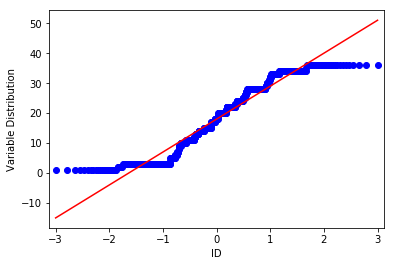

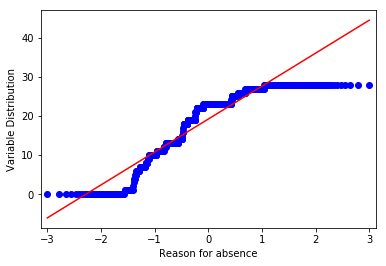

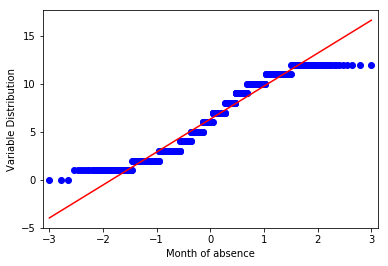

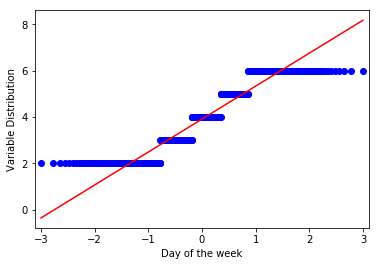

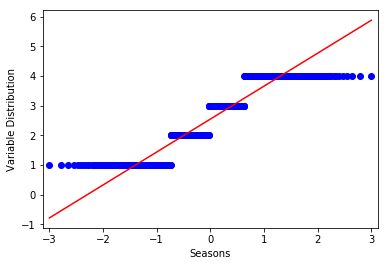

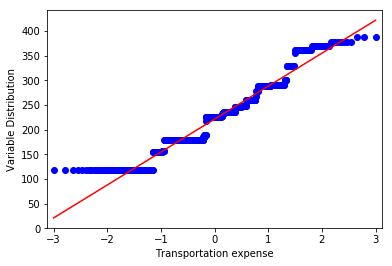

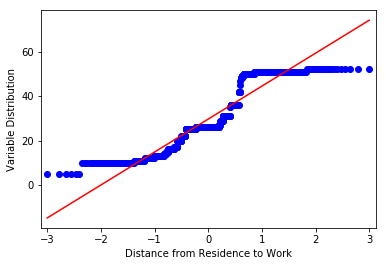

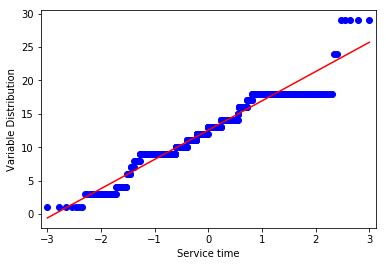

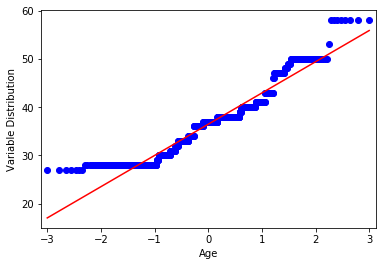

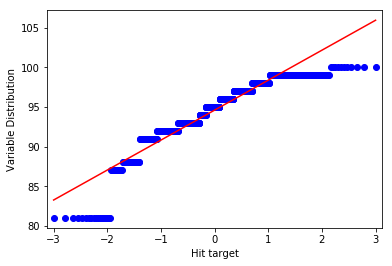

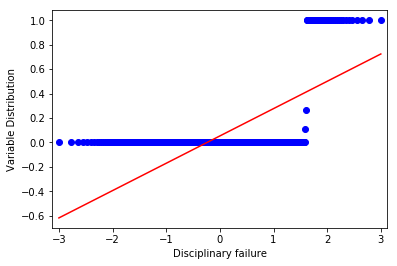

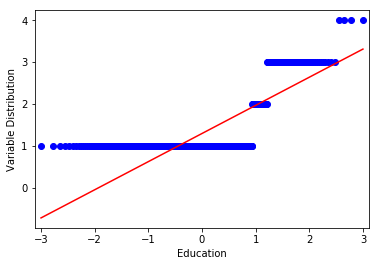

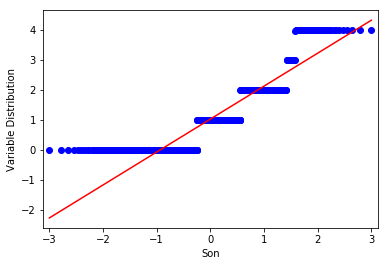

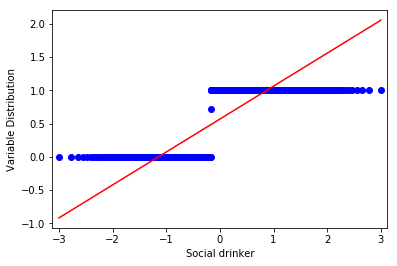

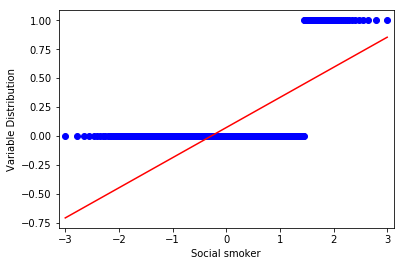

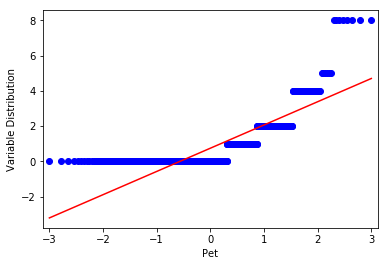

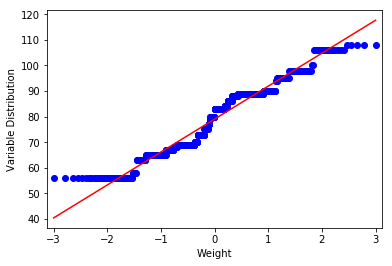

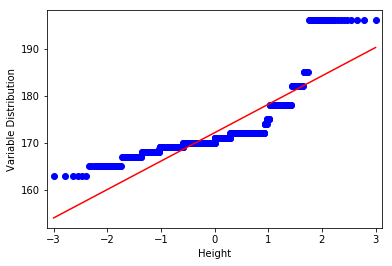

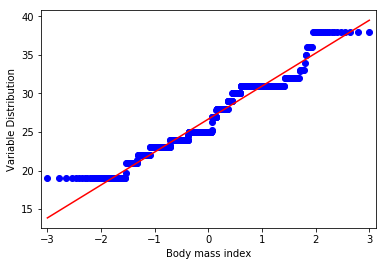

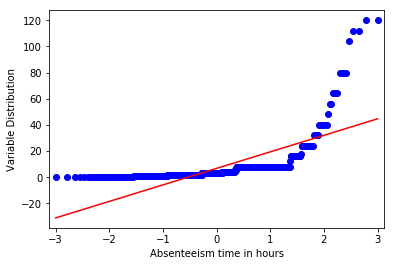

In [187]:
for col in df.columns:
    if(col!='Work load Average/day'):
        print(GetQQplot(df,col))

In [163]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [156]:
df.columns = df.columns.str.strip().str.replace('Work load Average day', 'Work Load')
df['Work Load']

0      239554.0
1      239554.0
2      239554.0
3      239554.0
4      239554.0
5      239554.0
6      239554.0
7      239554.0
8      239554.0
9      239554.0
10     239554.0
11     239554.0
12     239554.0
13     239554.0
14     239554.0
15     239554.0
16     239554.0
17     239554.0
18     239554.0
19     205917.0
20     205917.0
21     205917.0
22     205917.0
23     205917.0
24     205917.0
25     205917.0
26     205917.0
27     205917.0
28     205917.0
29     205917.0
         ...   
710    275089.0
711    275089.0
712    275089.0
713    275089.0
714    275089.0
715    275089.0
716    275089.0
717    275089.0
718    275089.0
719    275089.0
720    275089.0
721    275089.0
722    275089.0
723    275089.0
724    275089.0
725    264604.0
726    264604.0
727    264604.0
728    264604.0
729    264604.0
730    264604.0
731    264604.0
732    264604.0
733    264604.0
734    264604.0
735    264604.0
736    264604.0
737    271219.0
738    271219.0
739    271219.0
Name: Work Load, Length:

In [ ]:
#Plot boxplot to visualize Outliers
%matplotlib inline
#for i in cnames:
plt.figure(figsize=(10,10))
plt.boxplot(df['ID'])

In [ ]:
numerical_cnames = []

# Correlation Matrix

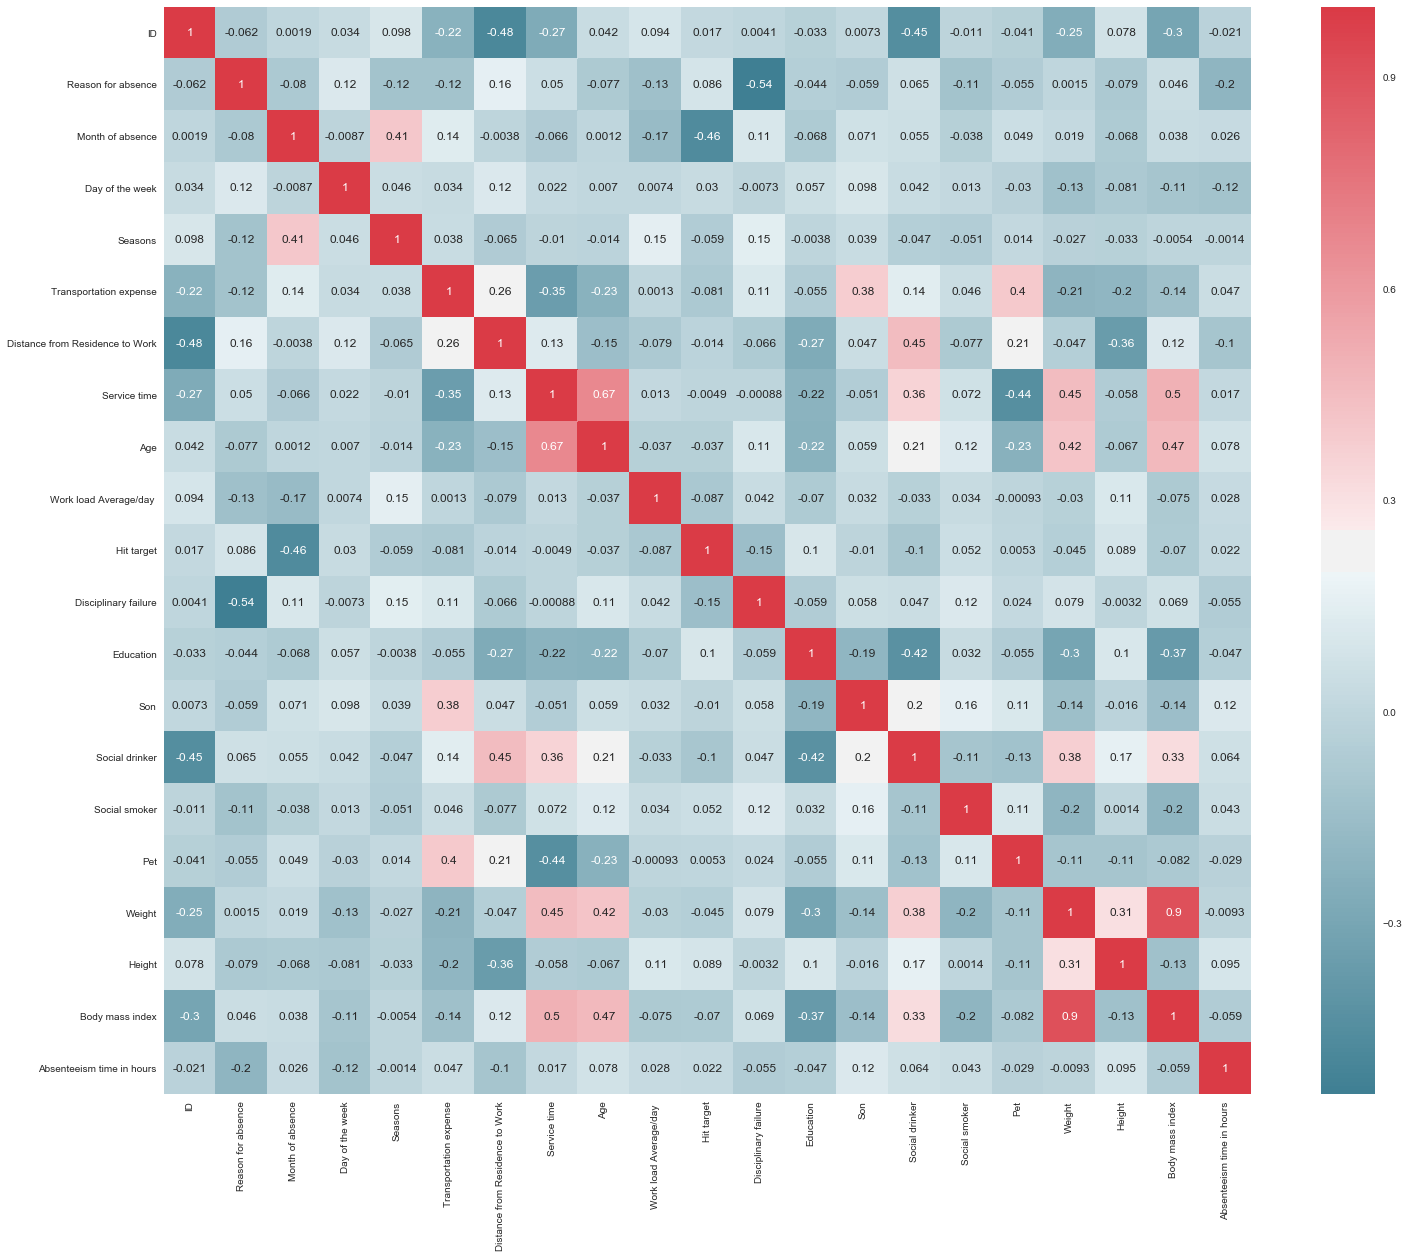

In [283]:
import seaborn as sns
df_corr = df
f, ax = plt.subplots(figsize=(25, 20))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
#sns.heatmap(corr, linewidths=0.4,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)
plt.savefig("CorrelationAnalysis.jpg")

# Univariate Analysis

In [ ]:
plt.figure(figsize=(55,30))
#gridspec.GridSpec(4,2)
#plt.subplot2grid((4,2),(0,0))
#sns.countplot(df['Reason for absence'])
#plt.savefig('Bar Graphs\\Bar Graph ROA.jpg')

#plt.subplot2grid((4,2),(0,1))
#sns.countplot(df['Distance from Residence to Work'])
#plt.savefig('Bar Graphs\\Bar Graph DistancetoWork.jpg')

#plt.subplot2grid((4,2),(1,0))
#sns.countplot(df['Day of the week'])
#plt.savefig('Bar Graphs\\Bar Grap Day Of Week.jpg')

#plt.subplot2grid((4,2),(1,1))
#sns.countplot(df['Social smoker'])
#plt.savefig('Bar Graphs\\Bar Grap Smoker.jpg')
#sns.set(rc={'figure.figsize':(20,15)})

#plt.subplot2grid((4,2),(2,0))
sns.countplot(df['Month of absence'])
plt.savefig('Bar Graphs\\Bar Grap Month.jpg')

#plt.subplot2grid((4,2),(3,0))
sns.countplot(df['Seasons'])
plt.savefig('Bar Graphs\\Bar Grap Seasons.jpg')

sns.countplot(df['Social drinker'])
plt.savefig('Bar Graphs\\Bar Grap Social drinker.jpg')

In [ ]:
#Box plot between categorical independent and continuous dependent variables    
def box(col):
    sns.boxplot(x= col, y = df['Absenteeism time in hours'], showmeans=True)
    plt.show()
    
df[cat_names].apply(box)

# Multivariate Analysis

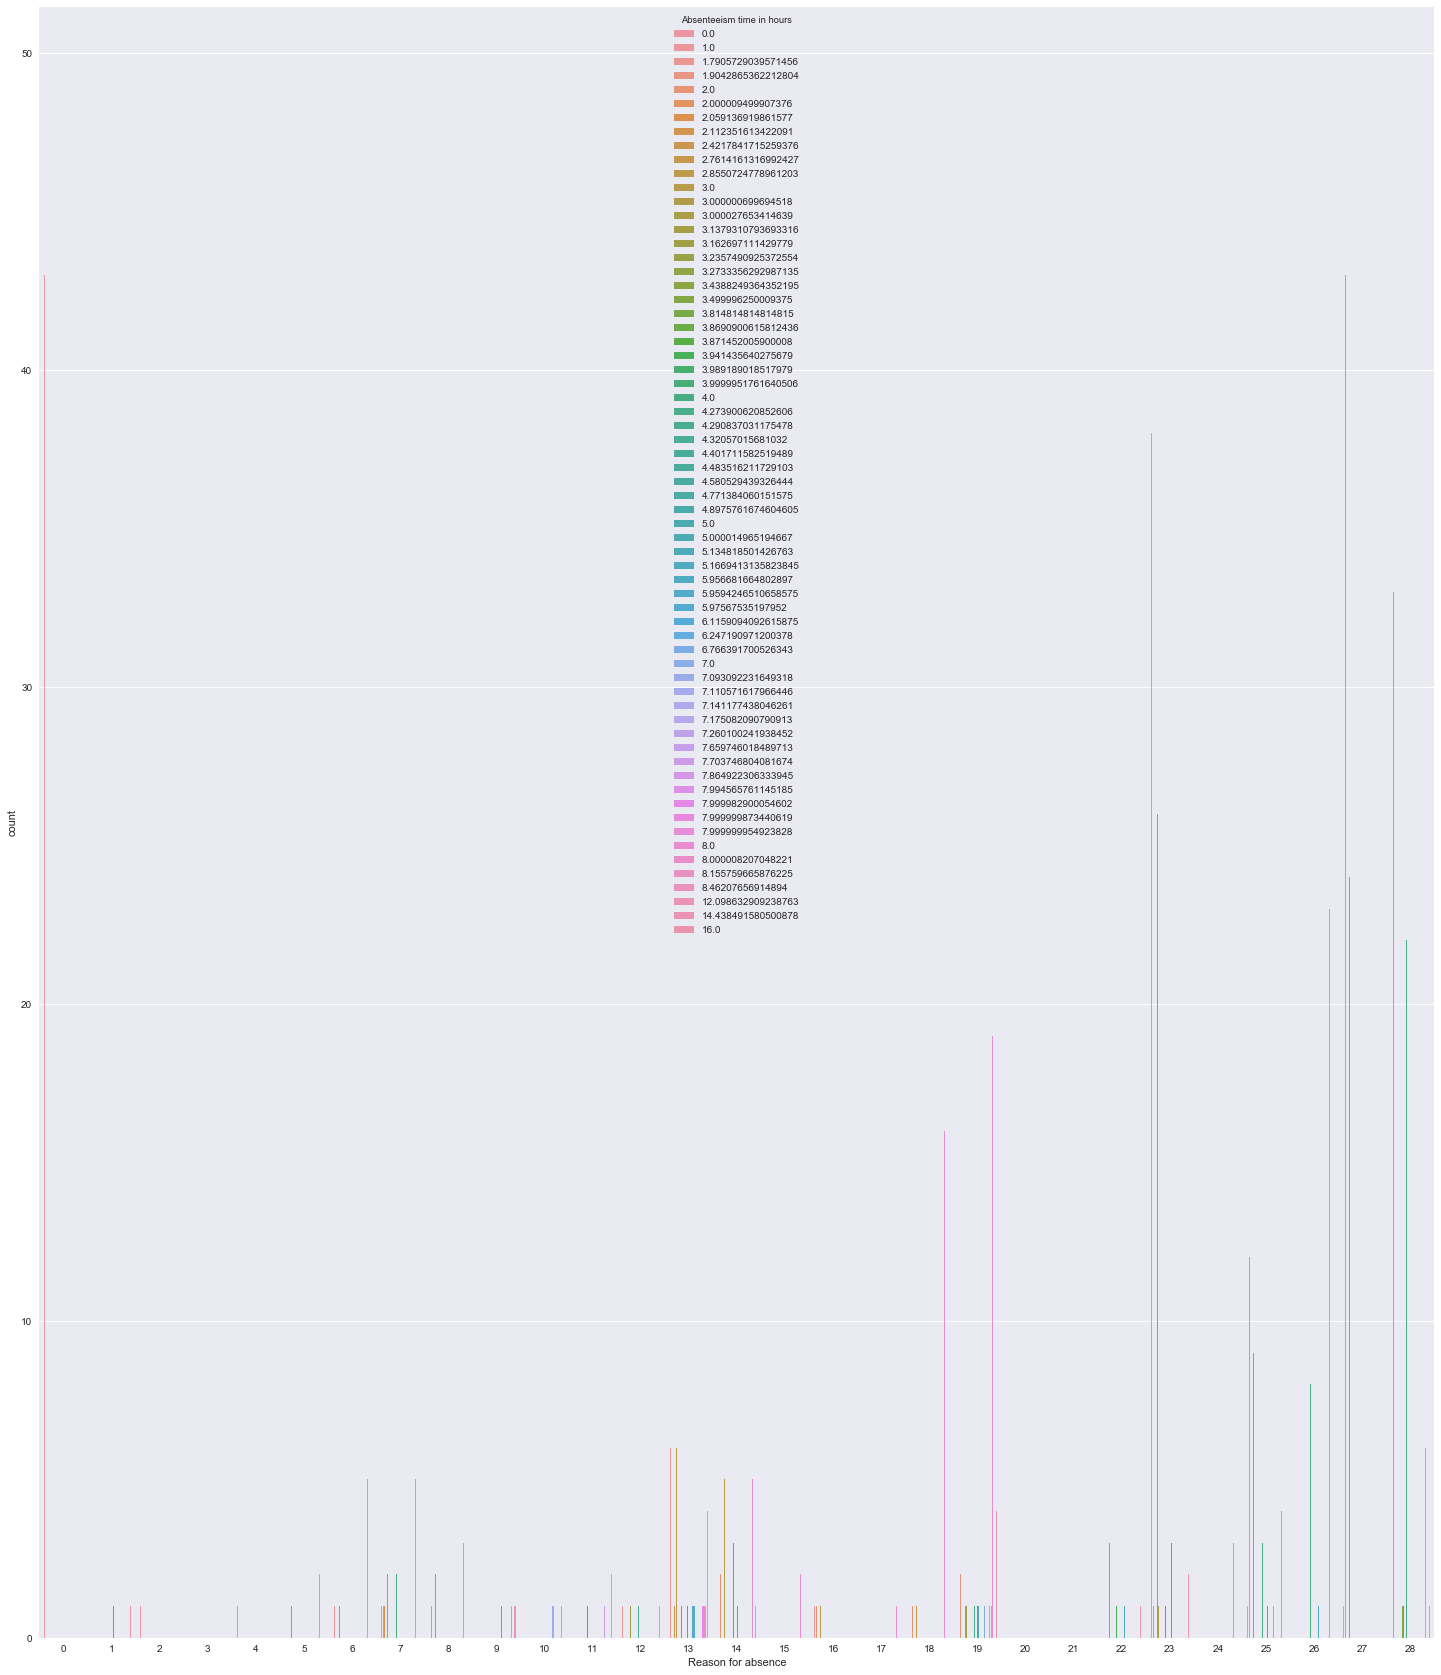

In [250]:
plt.figure(figsize=(25,30))
sns.countplot(x = 'Reason for absence', hue = 'Absenteeism time in hours',data = df)
plt.savefig("Multivariate plots\\ROA vs Absenteeism.jpg")

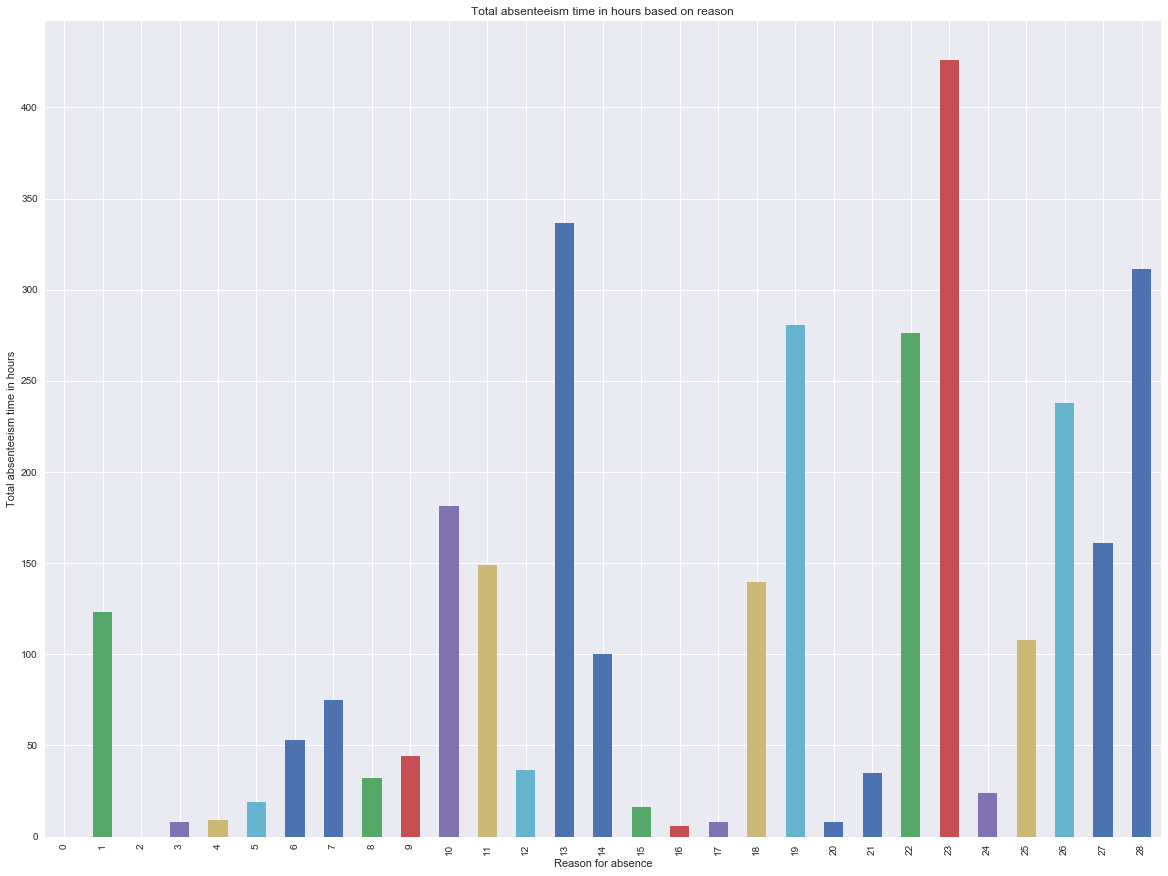

In [254]:
var = df.groupby('Reason for absence')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Reason for absence')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on reason") #Chart title
var.plot(kind='bar')
plt.savefig('Multivariate plots\\GP_ROA.jpg')

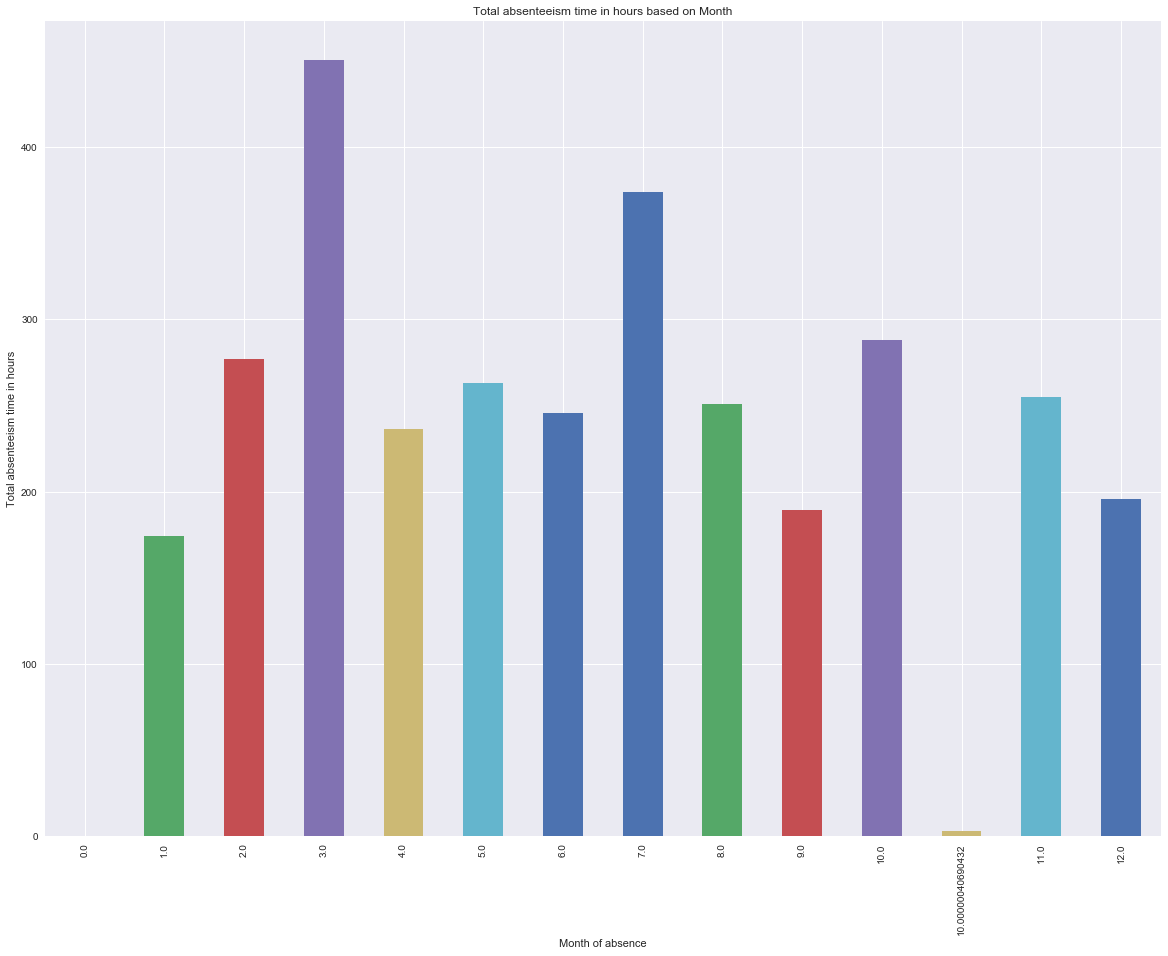

In [255]:
var = df.groupby('Month of absence')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Month of absence')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Month") #Chart title
var.plot(kind='bar')
plt.savefig('Multivariate plots\\GP_Month.jpg')

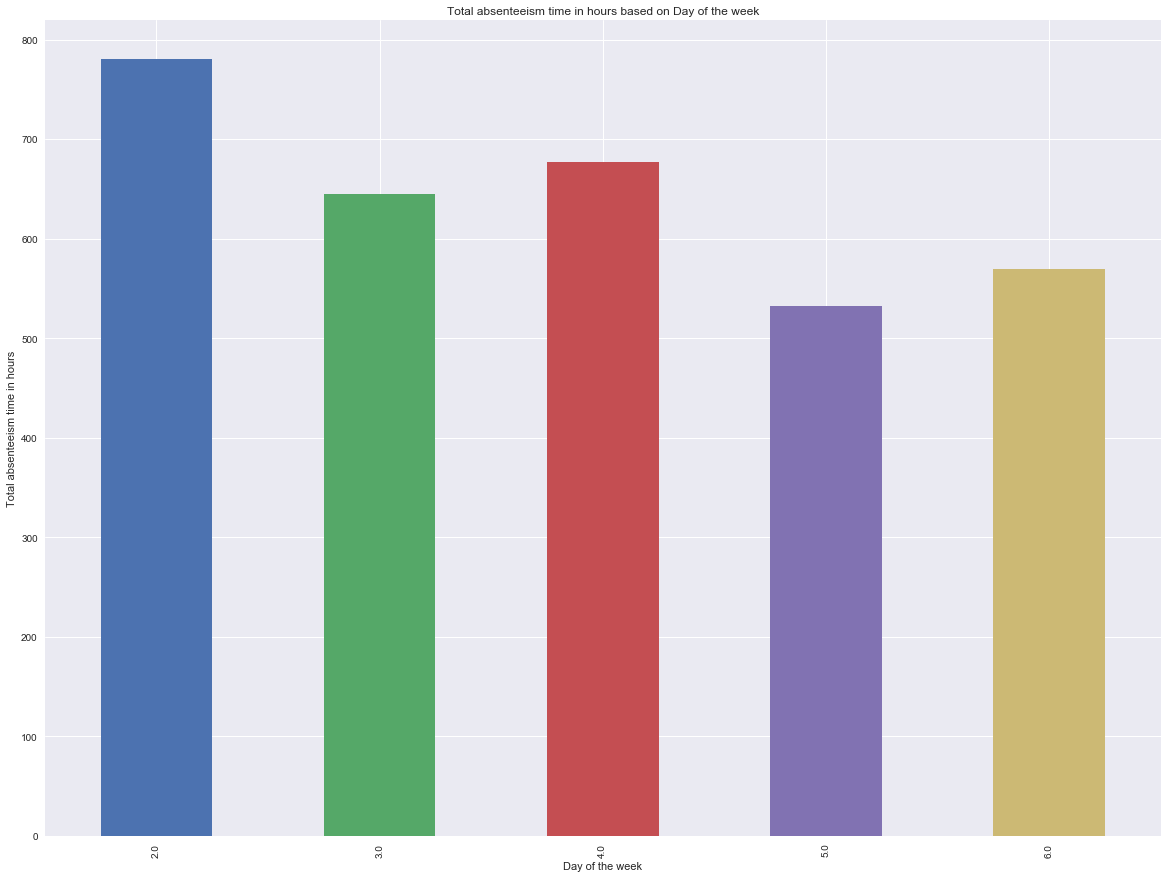

In [256]:
var = df.groupby('Day of the week')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Day of the week')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Day of the week") #Chart title
var.plot(kind='bar')
plt.savefig('Multivariate plots\\GP_Day.jpg')

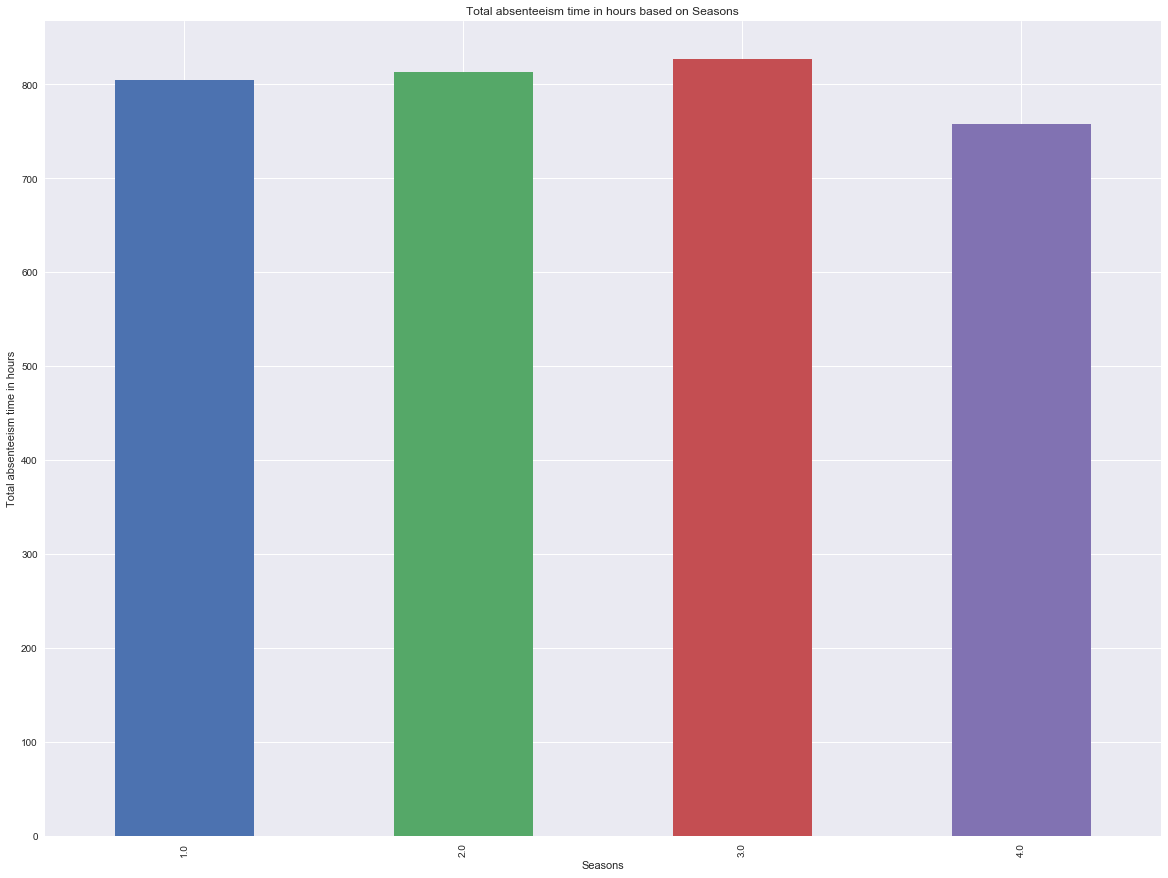

In [261]:
var = df.groupby('Seasons')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Seasons')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Seasons") #Chart title
var.plot(kind='bar')
plt.savefig('Multivariate plots\\GP_Season.jpg')

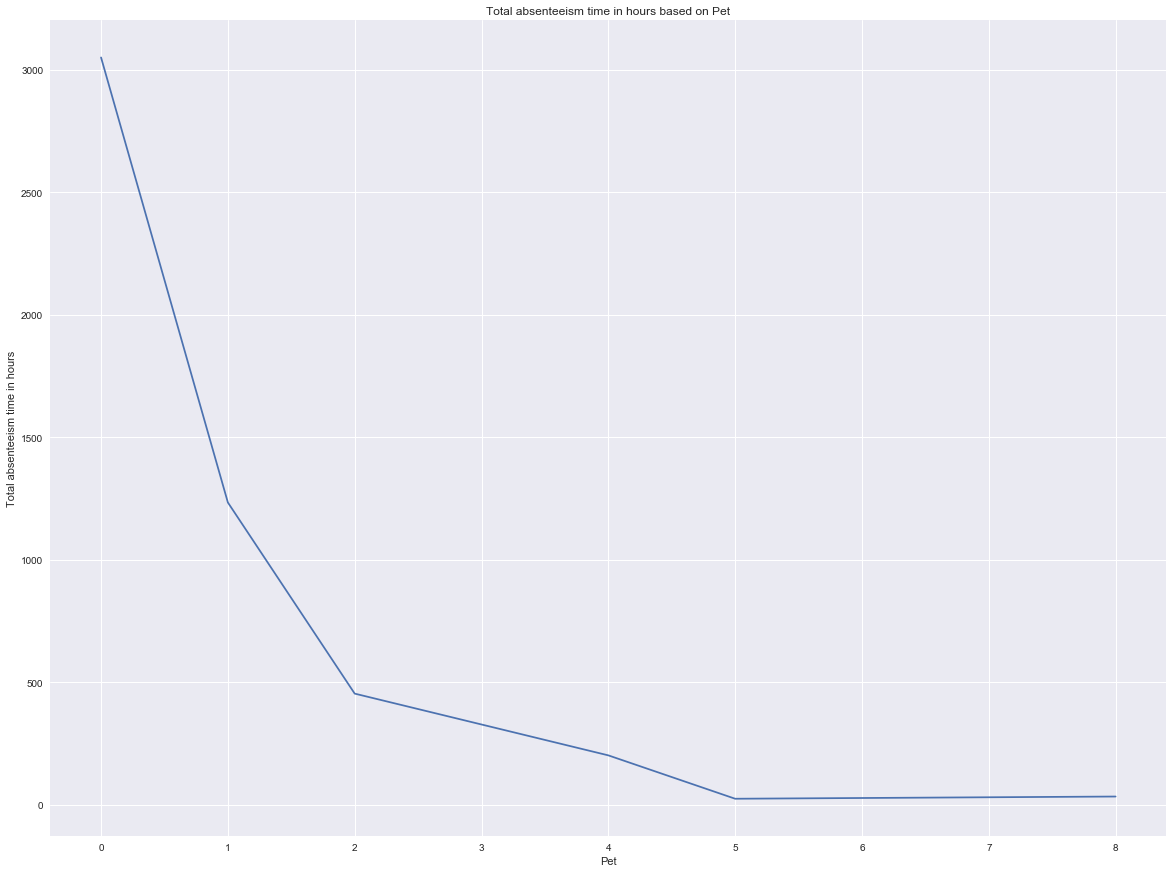

In [282]:
var = df.groupby('Pet')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Pet')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Pet") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Pet.jpg')

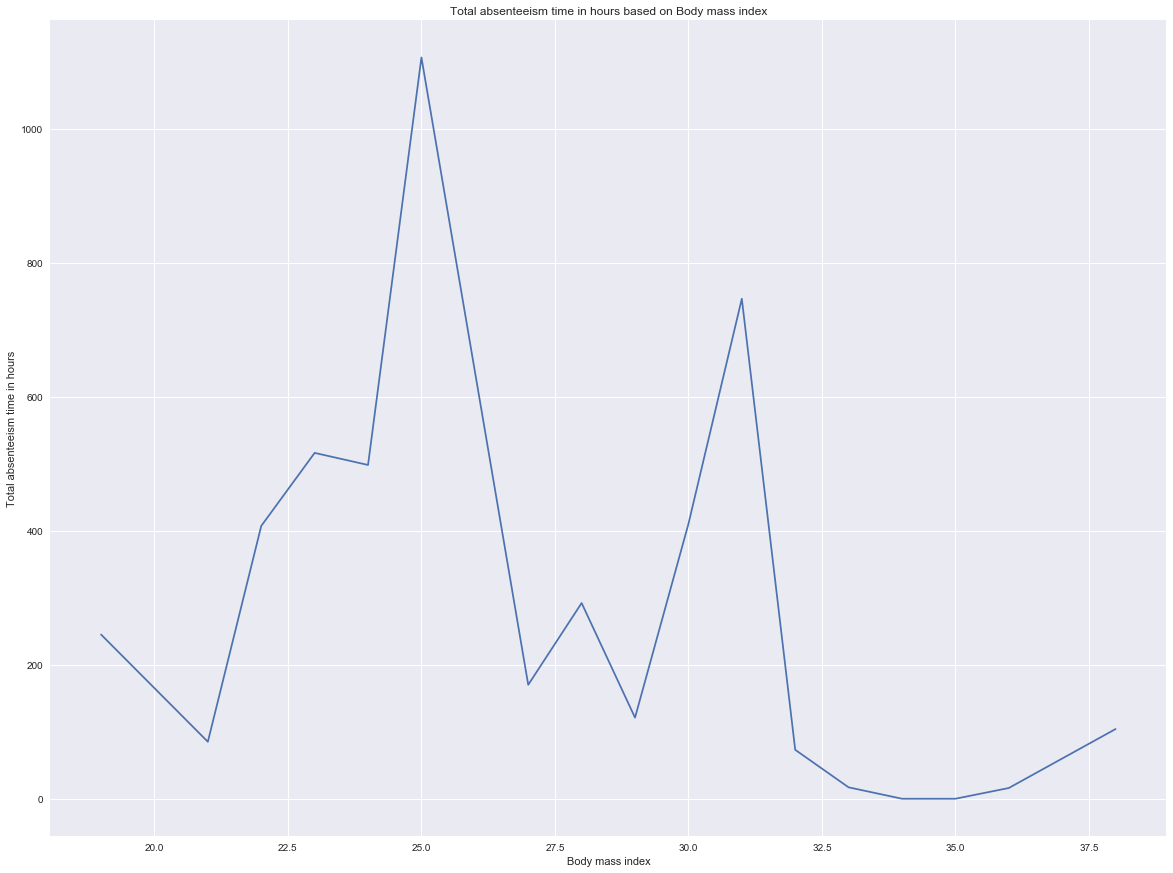

In [281]:
var = df.groupby('Body mass index')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Body mass index')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Body mass index") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Body mass index.jpg')

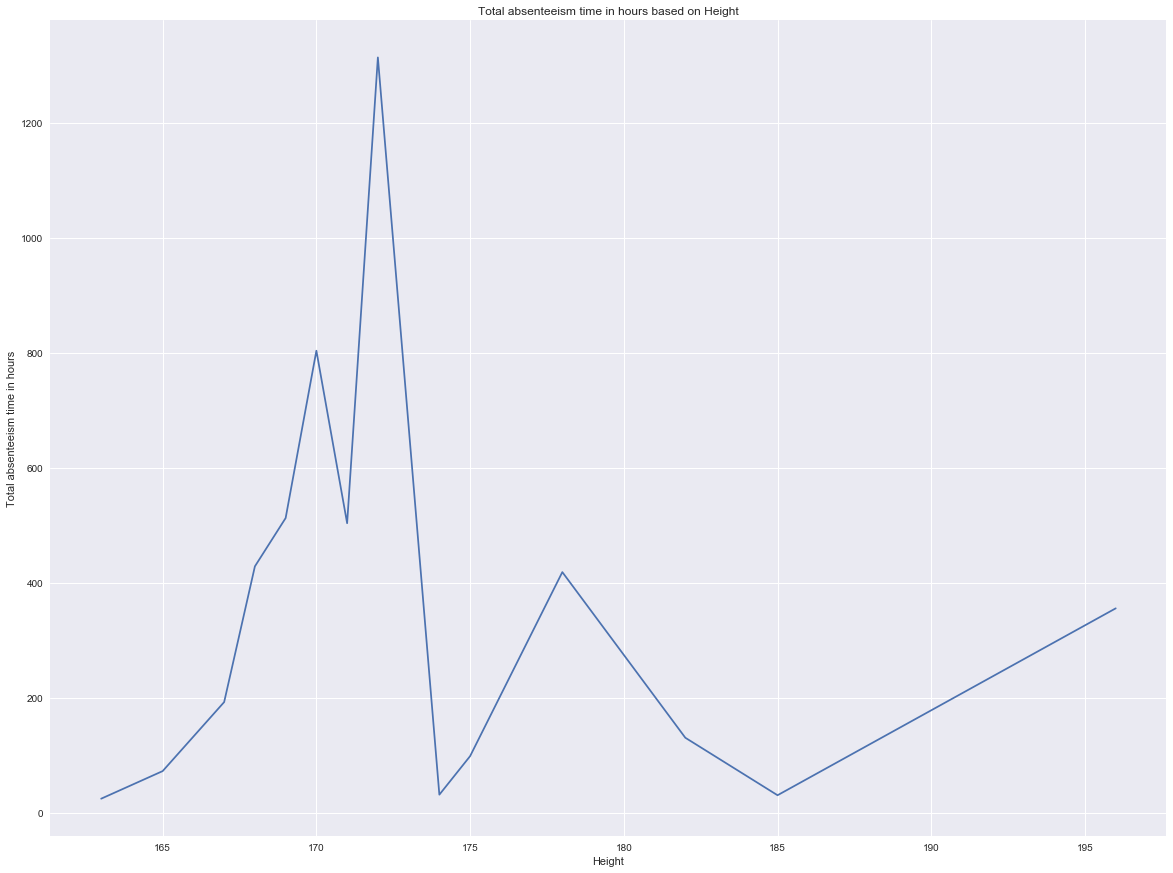

In [280]:
var = df.groupby('Height')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Height')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Height") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Height.jpg')

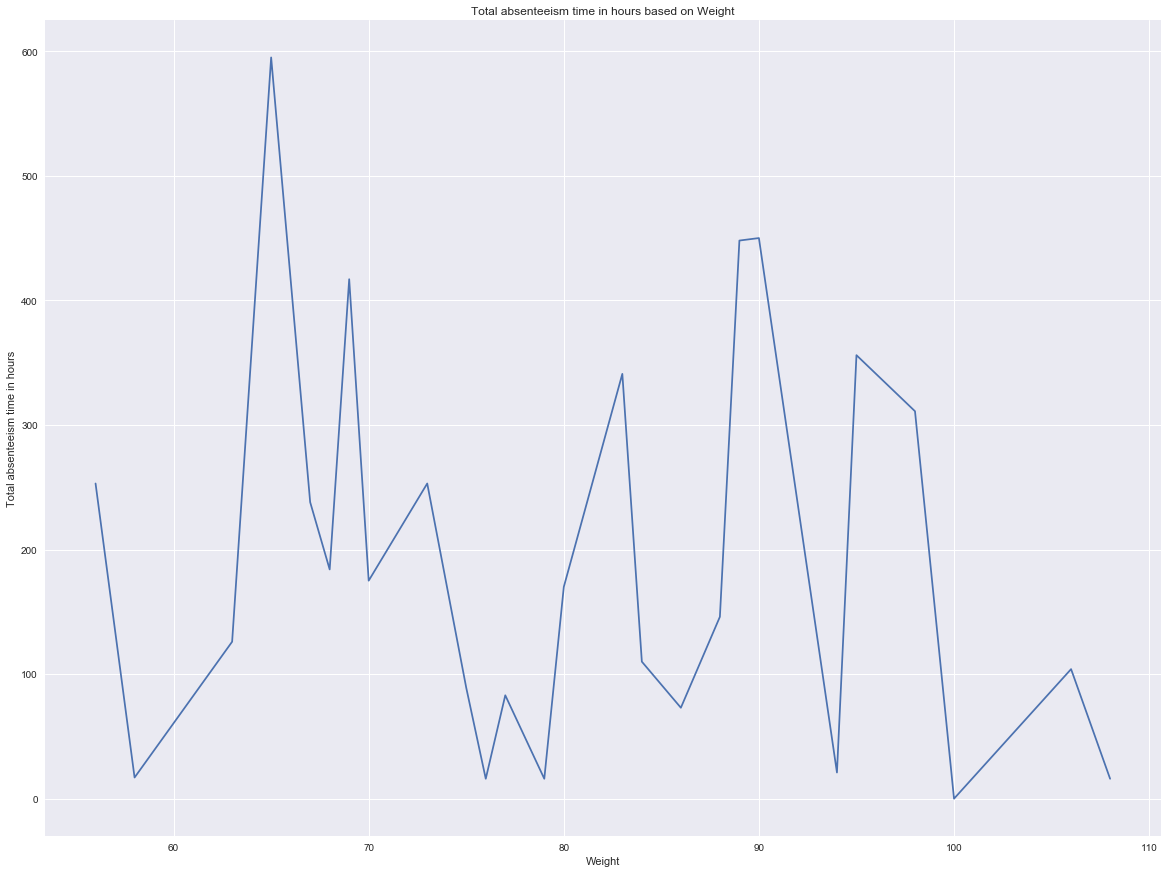

In [279]:
var = df.groupby('Weight')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Weight')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Weight") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Weight.jpg')

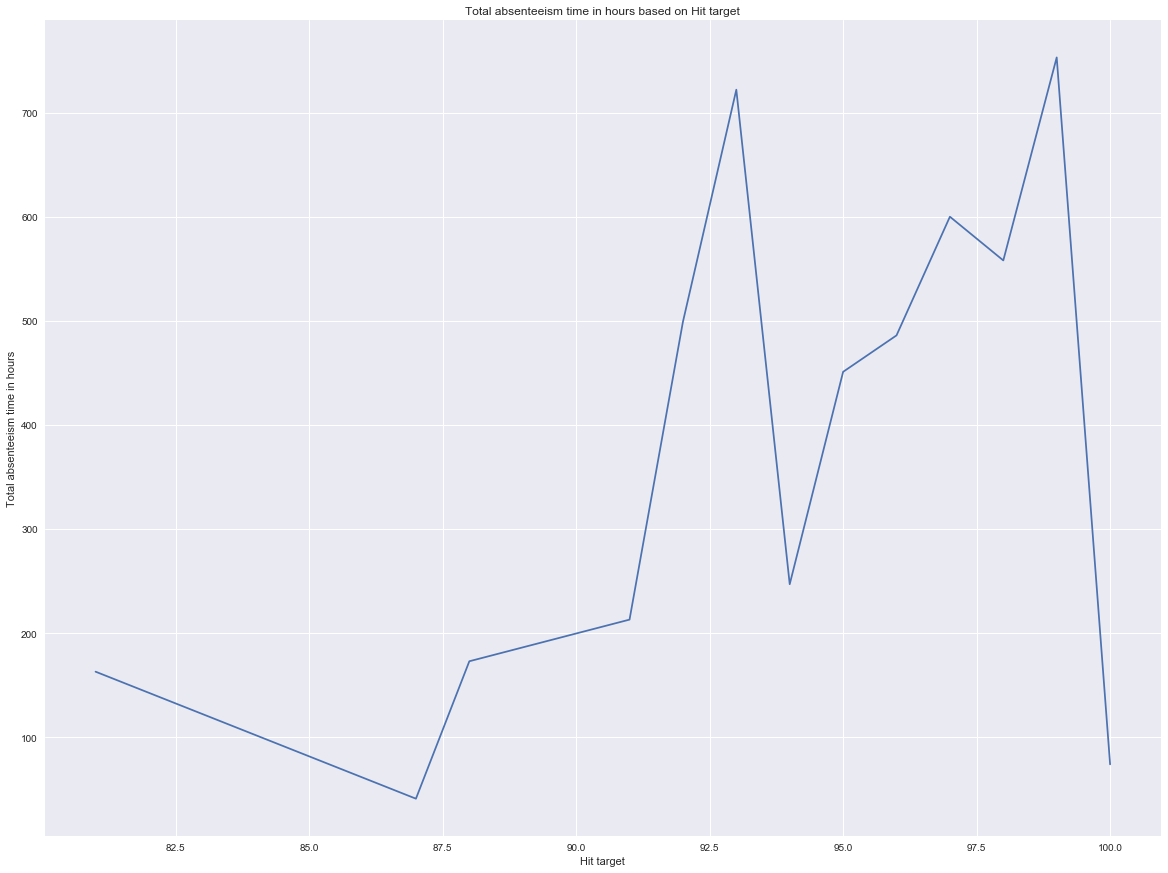

In [278]:
var = df.groupby('Hit target')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Hit target')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Hit target") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Hit target.jpg')

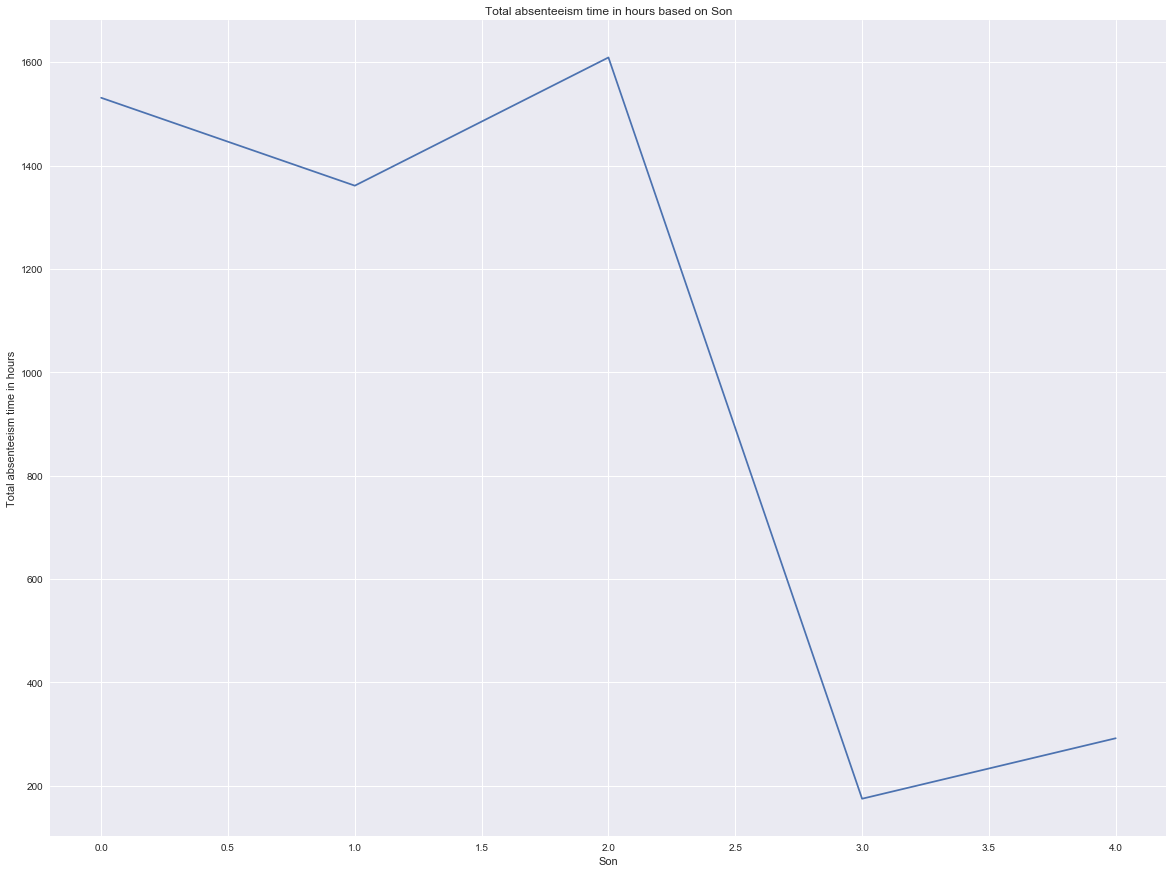

In [277]:
var = df.groupby('Son')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Son')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Son") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Son.jpg')

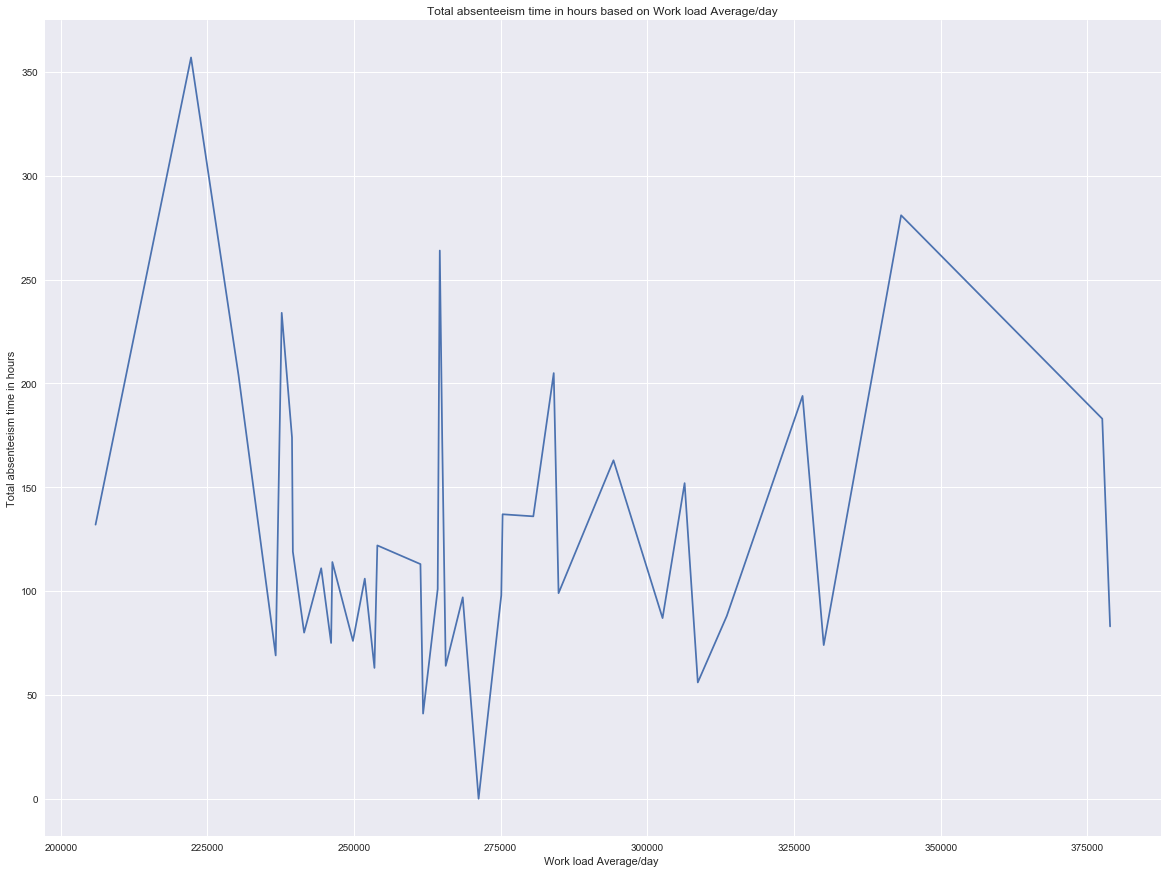

In [276]:
var = df.groupby('Work load Average/day ')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Work load Average/day')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Work load Average/day") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Work load.jpg')

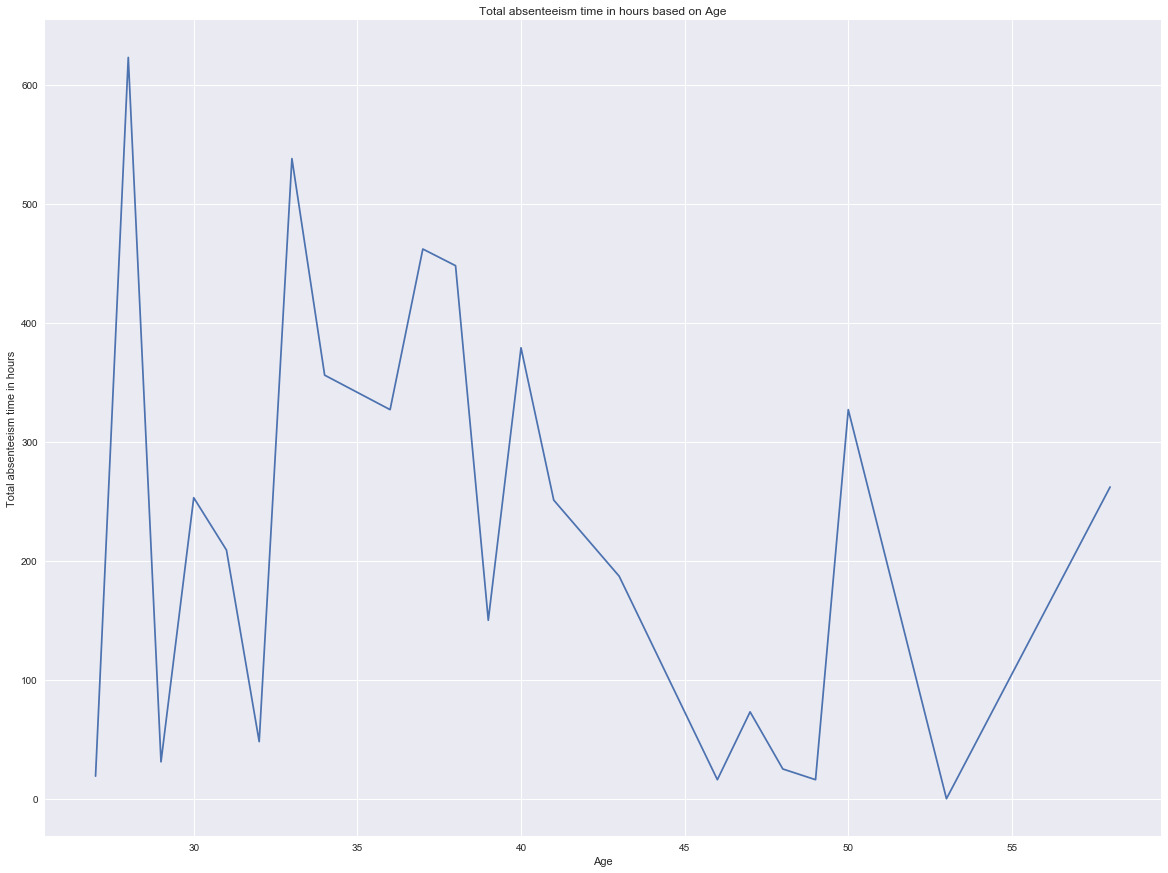

In [275]:
var = df.groupby('Age')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Age')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Age") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Age.jpg')

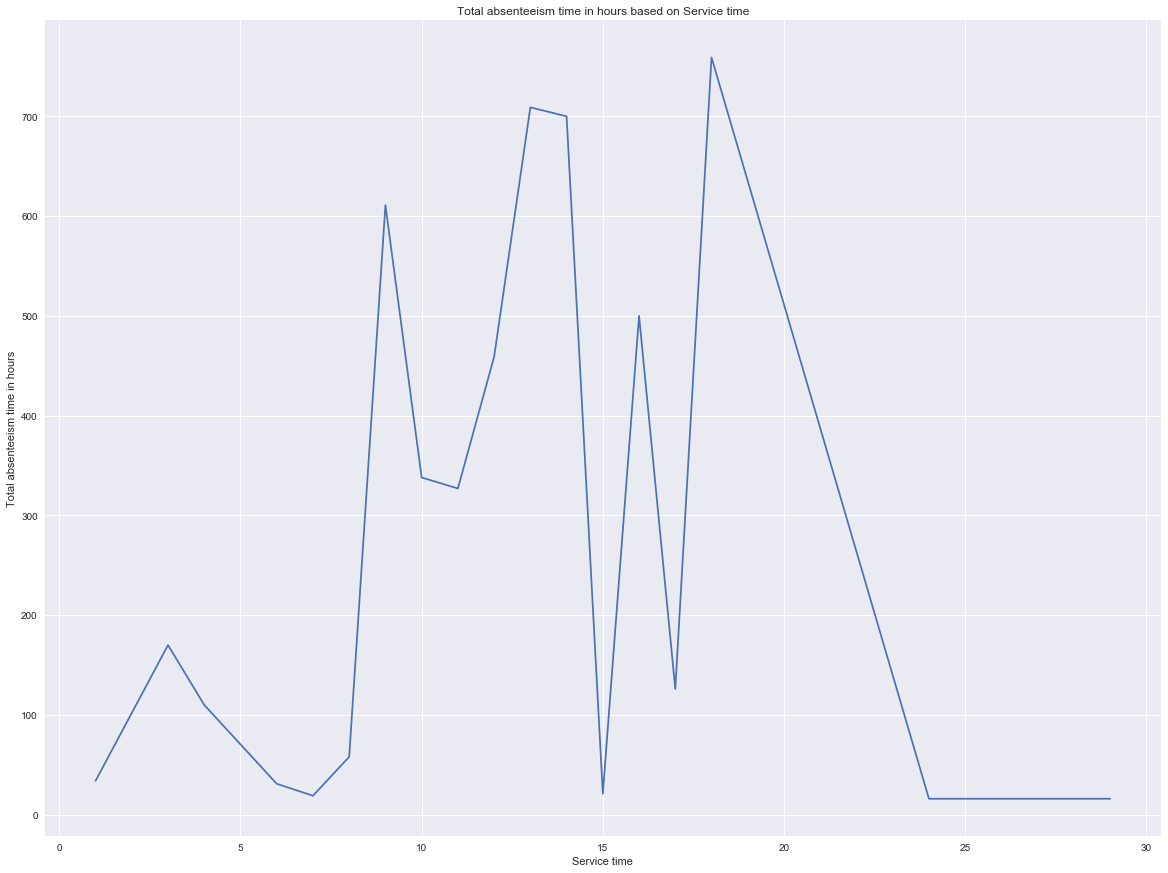

In [274]:
var = df.groupby('Service time')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Service time')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Service time") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Service time.jpg')

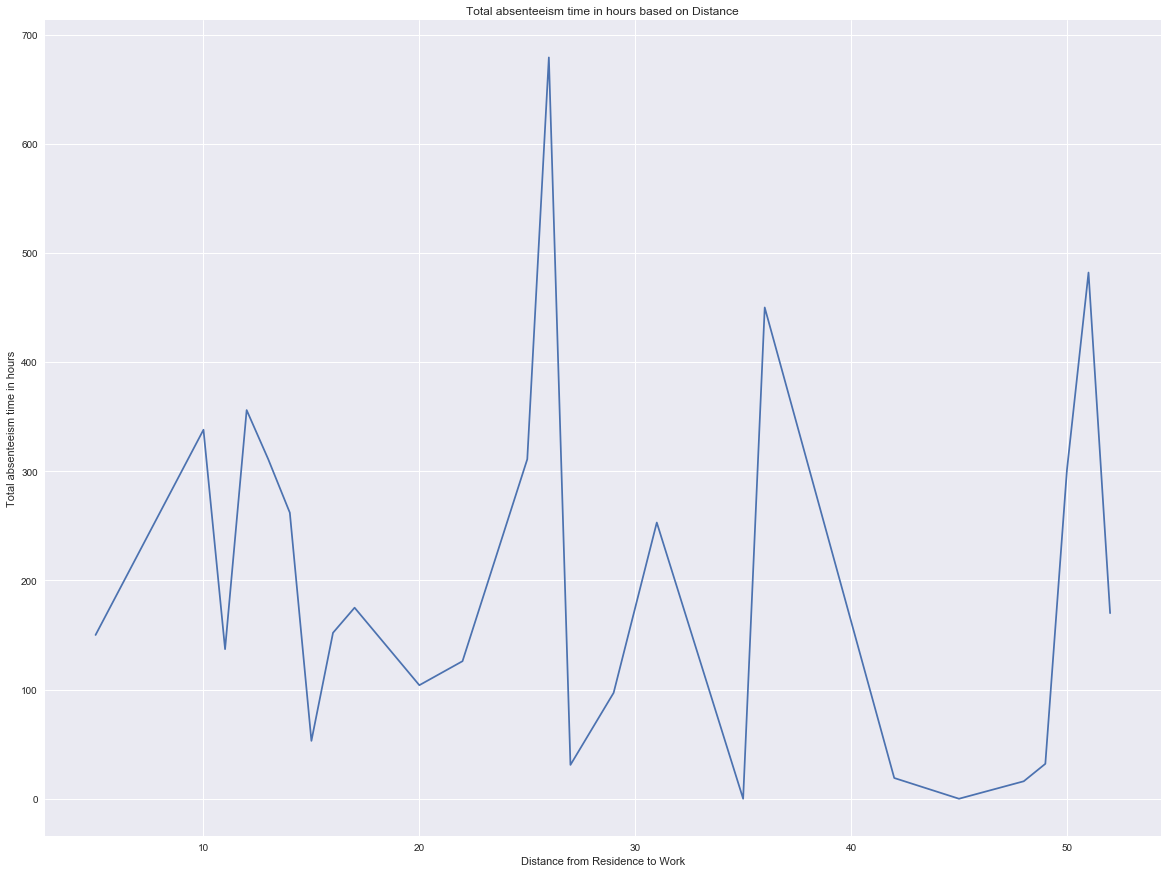

In [273]:
var = df.groupby('Distance from Residence to Work')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Distance from Residence to Work')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Distance") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Distance.jpg')

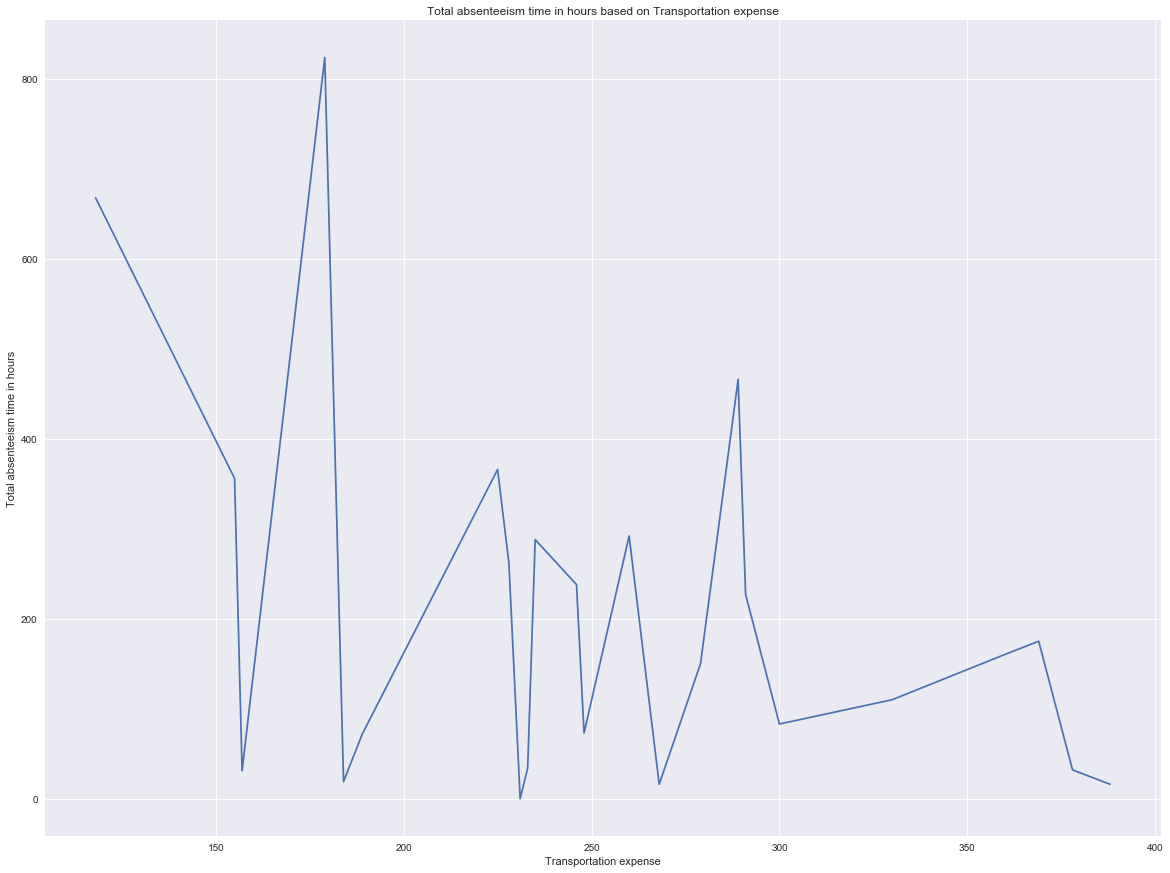

In [272]:
var = df.groupby('Transportation expense')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Transportation expense')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Transportation expense") #Chart title
var.plot(kind='line')
plt.savefig('Multivariate plots\\GP_Transportation expense.jpg')

In [ ]:
var = df.groupby('Social smoker')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Social smoker')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Social smoker") #Chart title
var.plot(kind='bar')
plt.savefig('Multivariate plots\\GP_Social smoker.jpg')

In [269]:
var = df.groupby('Social smoker')['Absenteeism time in hours'].sum()
var

Social smoker
0.0    4511.0
1.0     463.0
Name: Absenteeism time in hours, dtype: float64

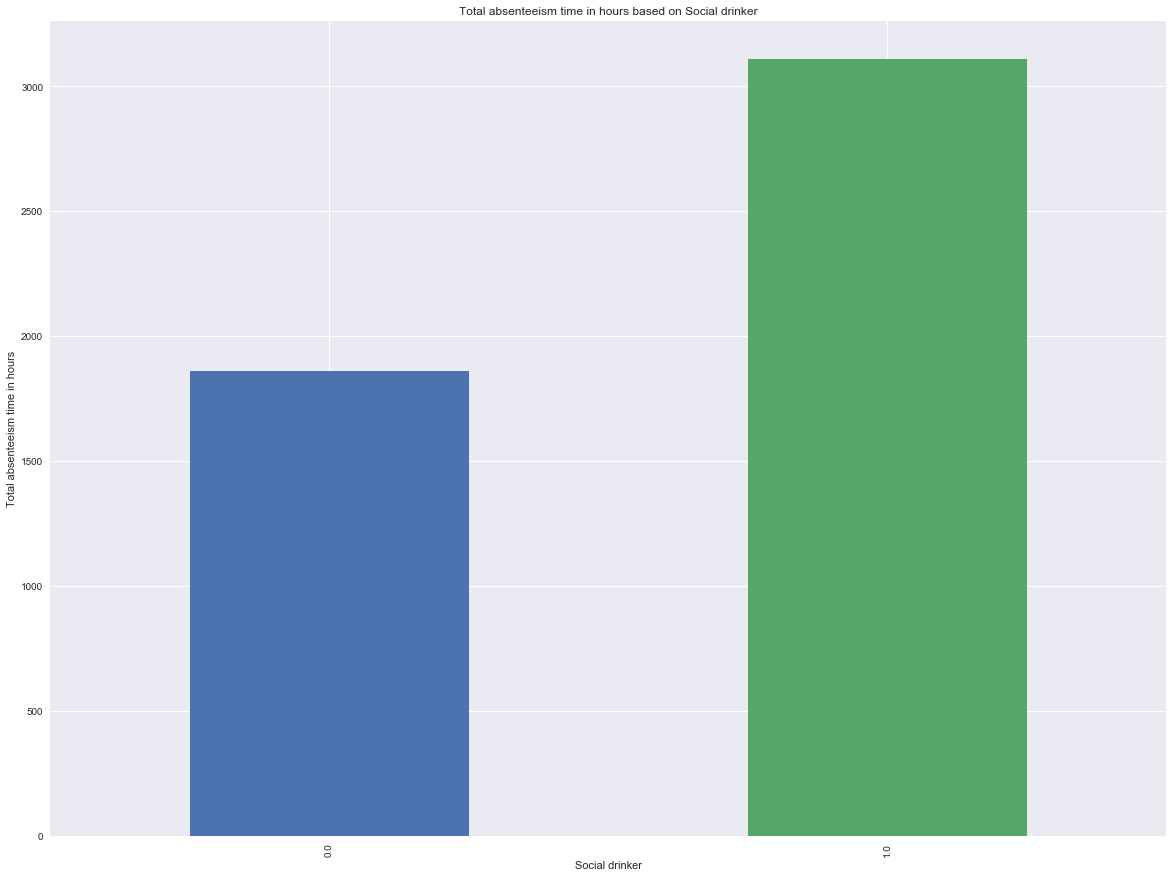

In [266]:
var = df.groupby('Social drinker')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Social drinker')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Social drinker") #Chart title
var.plot(kind='bar')
plt.savefig('Multivariate plots\\GP_Social drinker.jpg')

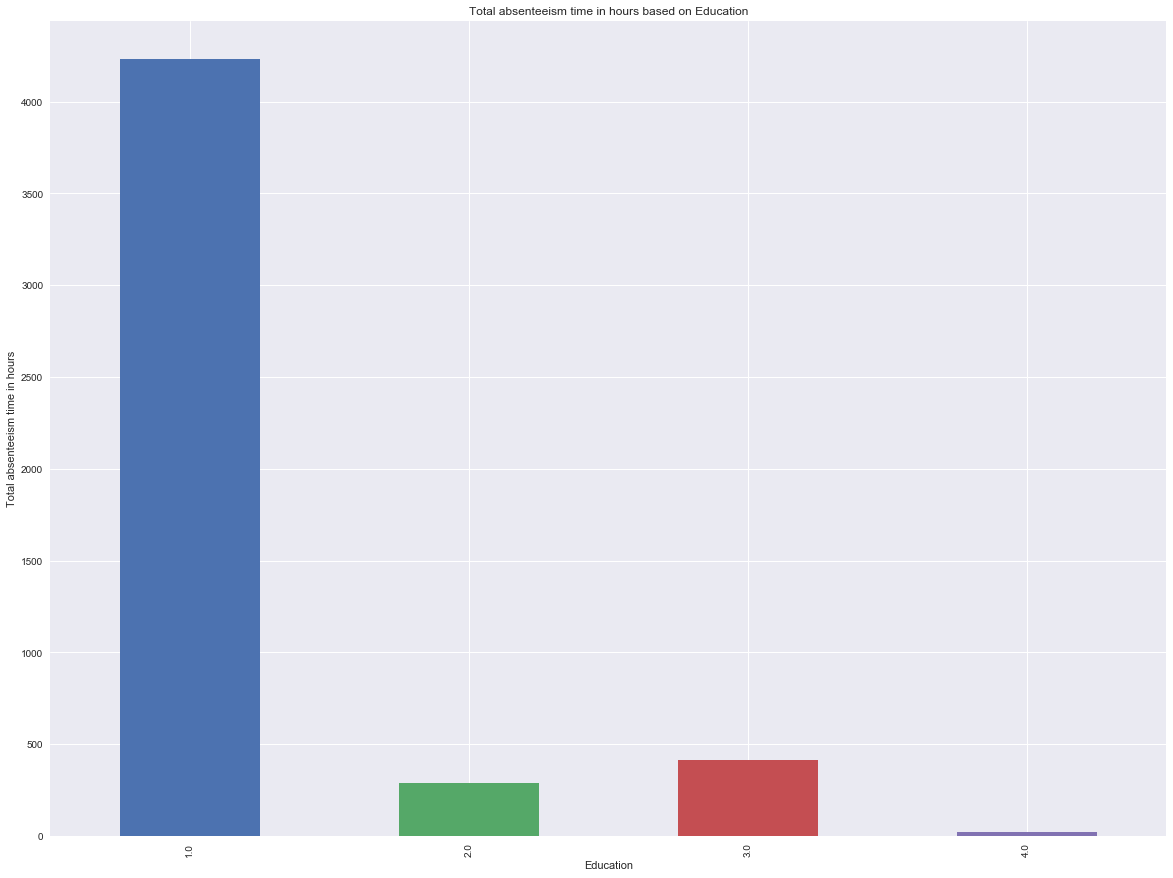

In [265]:
var = df.groupby('Education')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Education')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Education") #Chart title
var.plot(kind='bar')
plt.savefig('Multivariate plots\\GP_Education.jpg')

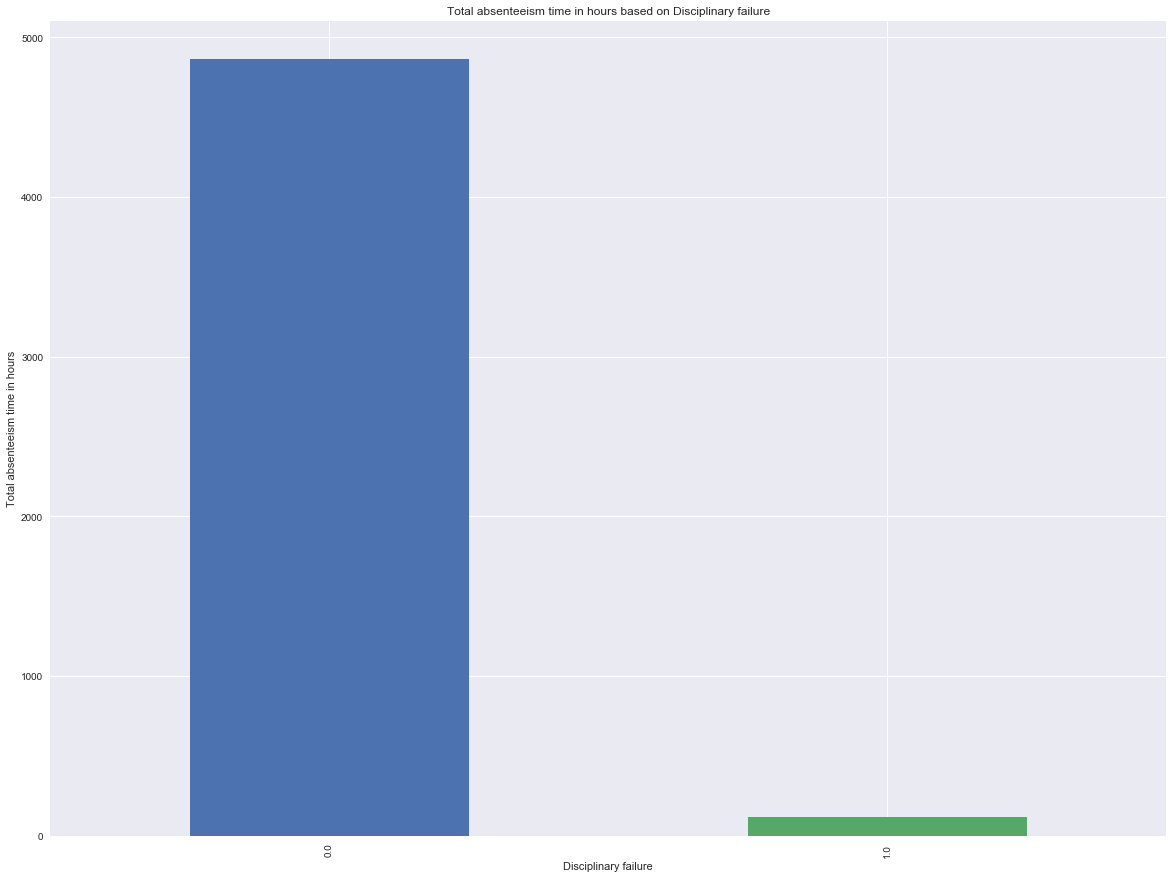

In [264]:
var = df.groupby('Disciplinary failure')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('Disciplinary failure')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on Disciplinary failure") #Chart title
var.plot(kind='bar')
plt.savefig('Multivariate plots\\GP_Disciplinary failure.jpg')

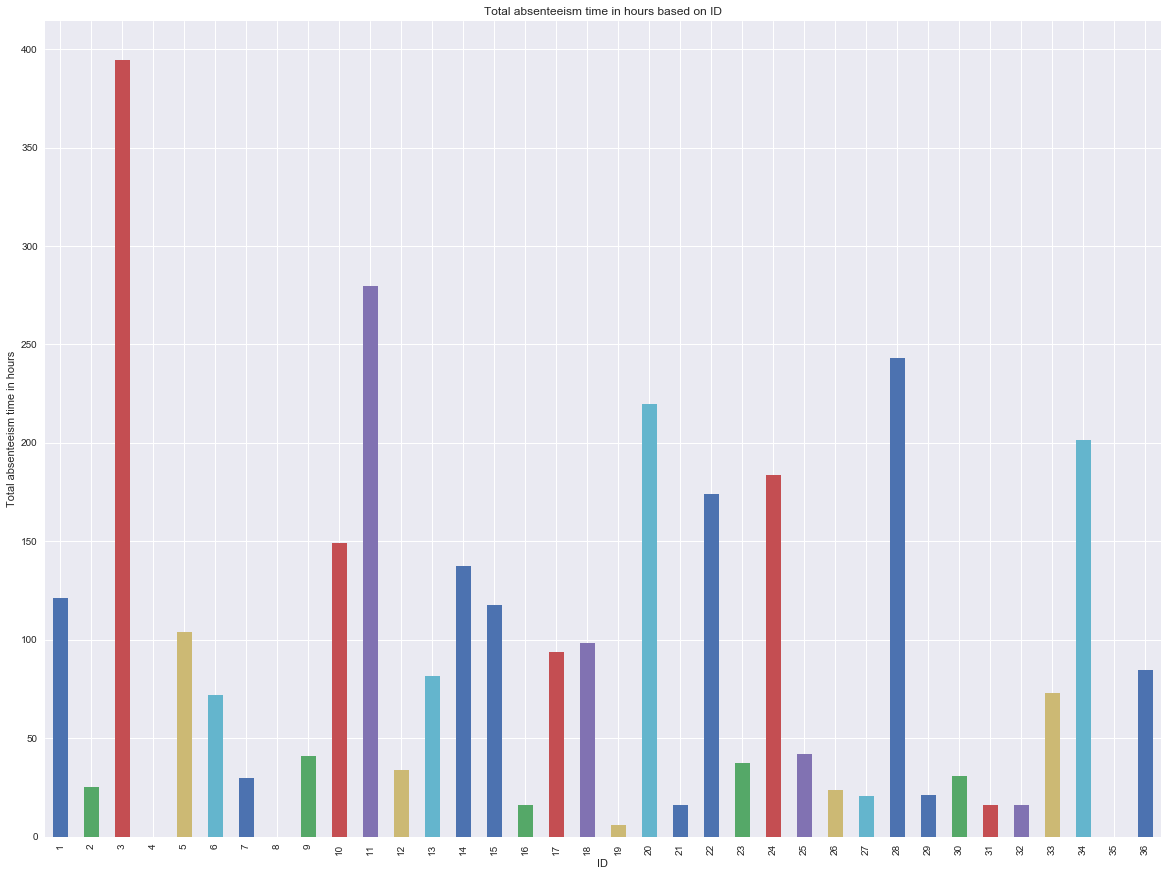

In [260]:
var = df.groupby('ID')['Absenteeism time in hours'].sum()
f, ax1 = plt.subplots(1, 1)
ax1.set_xlabel('ID')  #X-axis label
ax1.set_ylabel('Total absenteeism time in hours') #Y-axis label
ax1.set_title("Total absenteeism time in hours based on ID") #Chart title
var.plot(kind='bar')
plt.savefig('Multivariate plots\\GP_ID.jpg')

In [246]:
df.groupby('Reason for absence')['Absenteeism time in hours'].sum()

Reason for absence
0       0.000000
1     123.000015
2       0.000000
3       8.000000
4       9.000000
5      19.000000
6      52.785139
7      74.673044
8      32.000000
9      44.414167
10    181.165651
11    148.692936
12     36.565886
13    336.554605
14     99.963406
15     16.000000
16      6.000000
17      8.000000
18    139.855072
19    280.661288
20      8.000000
21     35.000000
22    275.983191
23    426.000032
24     24.000000
25    108.000000
26    237.956682
27    161.000000
28    311.369086
Name: Absenteeism time in hours, dtype: float64